In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('fivethirtyeight')
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['figure.facecolor'] = 'w'
mpl.rcParams['legend.framealpha'] = 1
import numpy as np
import progressbar as pb
import scipy.special as ss

In [2]:
def calcDelay(p, n, e2):
    return 8 * ( 5 * ( p - n ) + max(24-e2, 0) - max(e2-8, 0))

def calcProb(alpha, p, n, e1, e2):
    return ss.binom(32, e1) * ss.binom(32, e2) * np.power(alpha, e1 + e2 + n + 1) * np.power(1 - alpha, 64 - e1 - e2) 

def calcRewardDiff(p, e1, e2):
    return 16 * (1/(p+1) + e2/160 - 1/5) + 2 * e1 * (1 / (p+1) - 1)

In [3]:
ps = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
es = np.arange(0, 33)

min_prob = 1 / float(5.256e7)

In [11]:
x = np.arange(0.1, 0.5, 0.025)

In [9]:
plot = []`
bar = pb.ProgressBar()
for alpha in bar(x):
    results = {}
    for p in ps:
        for n in ns:
            for e1 in es:
                for e2 in es:
                    if (calcDelay(p, n, e2) < 0) and (calcRewardDiff(p, e1, e2) > 0):
                        prob = calcProb(alpha, p, n, e1, e2)
                        if prob > min_prob:
                            results[(p, n, e1, e2)] = prob
    total_prob = 0
    for result in results:
        total_prob += results[result]
    plot.append(total_prob)

100% (16 of 16) |########################| Elapsed Time: 0:00:19 Time:  0:00:19


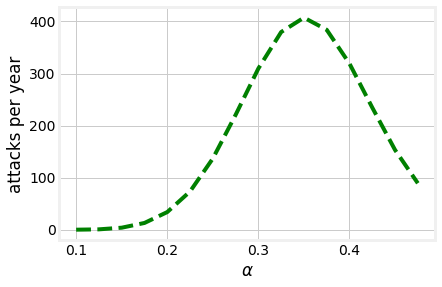

In [19]:
plt.plot(x, np.asarray(plot)*525600, 'g--')
plt.ylabel('attacks per year')
plt.xlabel(r'$\alpha$')
plt.show()

In [5]:
total_prob = 0
for result in results:
    total_prob += results[result]

In [6]:
total_prob

0.0006068949984423209

In [47]:
total_prob * 525600

318.98401118128385

In [48]:
sorted(results, key=results.__getitem__, reverse=True)

[(1, 2, 6, 14),
 (1, 1, 6, 17),
 (1, 2, 6, 15),
 (1, 2, 6, 16),
 (1, 1, 6, 18),
 (1, 3, 6, 13),
 (1, 3, 6, 14),
 (1, 2, 6, 17),
 (1, 2, 5, 14),
 (1, 3, 6, 15),
 (1, 1, 5, 17),
 (1, 2, 5, 15),
 (1, 1, 6, 19),
 (1, 3, 6, 16),
 (1, 2, 6, 18),
 (1, 2, 5, 16),
 (1, 4, 6, 13),
 (1, 1, 5, 18),
 (1, 4, 6, 14),
 (1, 3, 5, 13),
 (1, 3, 5, 12),
 (1, 3, 6, 17),
 (1, 3, 5, 14),
 (1, 4, 6, 15),
 (1, 2, 5, 17),
 (1, 3, 5, 15),
 (1, 1, 6, 20),
 (1, 2, 6, 19),
 (1, 4, 6, 16),
 (1, 2, 4, 14),
 (1, 1, 5, 19),
 (1, 1, 4, 17),
 (1, 3, 6, 18),
 (1, 3, 5, 16),
 (1, 2, 4, 15),
 (1, 5, 6, 13),
 (1, 2, 5, 18),
 (1, 5, 6, 14),
 (1, 4, 5, 13),
 (1, 4, 5, 12),
 (1, 4, 6, 17),
 (1, 4, 5, 14),
 (1, 5, 6, 15),
 (1, 2, 4, 16),
 (1, 4, 5, 11),
 (1, 3, 5, 17),
 (1, 1, 4, 18),
 (1, 4, 5, 15),
 (1, 2, 6, 20),
 (1, 1, 6, 21),
 (1, 3, 4, 13),
 (1, 3, 6, 19),
 (1, 3, 4, 12),
 (1, 4, 5, 10),
 (1, 5, 6, 16),
 (1, 3, 4, 14),
 (1, 1, 5, 20),
 (1, 2, 5, 19),
 (1, 2, 4, 17),
 (1, 4, 6, 18),
 (1, 4, 5, 16),
 (1, 3, 4, 15),
 (1, 6, 

In [49]:
sorted(results.values(), reverse=True)

[5.2080772336556894e-05,
 4.629401985471725e-05,
 4.166461786924552e-05,
 2.9512437657382247e-05,
 2.5718899919287364e-05,
 2.302518355931989e-05,
 2.083230893462276e-05,
 1.85176079418869e-05,
 1.736025744551896e-05,
 1.6665847147698206e-05,
 1.5431339951572414e-05,
 1.3888205956415171e-05,
 1.2633845574386774e-05,
 1.1804975062952898e-05,
 1.0287559967714946e-05,
 9.837479219127414e-06,
 9.210073423727957e-06,
 8.572966639762455e-06,
 8.332923573849103e-06,
 7.675061186439962e-06,
 7.483184656778963e-06,
 7.407043176754761e-06,
 6.9441029782075855e-06,
 6.666338859079284e-06,
 6.172535980628966e-06,
 5.555282382566069e-06,
 5.474666415567604e-06,
 5.053538229754711e-06,
 4.72199002518116e-06,
 4.65006895862115e-06,
 4.211281858128925e-06,
 4.133394629885468e-06,
 4.115023987085979e-06,
 3.934991687650966e-06,
 3.72005516689692e-06,
 3.6840293694911825e-06,
 3.429186655904982e-06,
 3.333169429539642e-06,
 3.070024474575985e-06,
 2.993273862711585e-06,
 2.9628172707019044e-06,
 2.77764

In [213]:
def calcRewardDiff(p, e):
    return 16 * (1/(p+1) + e/160 - 1/5)